In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Alameda County Jury Panels ##

In [2]:
jury = Table.read_table('alameda.csv')

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


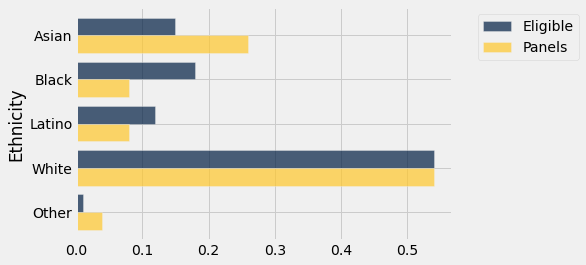

In [3]:
jury.barh('Ethnicity')

In [4]:
jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)

In [5]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [6]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

In [7]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [8]:
sum(jury_with_diffs.column('Absolute Difference'))

0.28

In [9]:
sum(jury_with_diffs.column('Absolute Difference')) / 2

0.14

In [10]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [11]:
total_variation_distance(jury.column('Eligible'), jury.column('Panels'))

0.14

In [12]:
eligible = jury.column('Eligible')

In [13]:
sample_distribution = sample_proportions(1453, eligible)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)

In [14]:
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.134205
Black,0.18,0.08,0.181005
Latino,0.12,0.08,0.128011
White,0.54,0.54,0.540262
Other,0.01,0.04,0.0165175


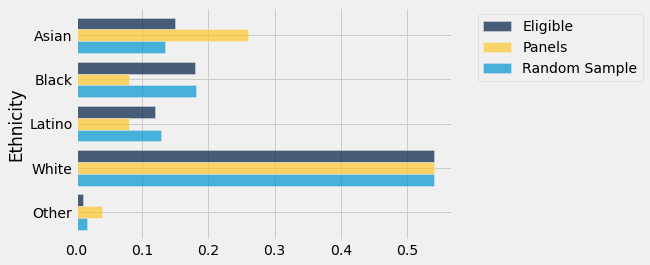

In [15]:
panels_and_sample.barh('Ethnicity')

In [16]:
total_variation_distance(panels_and_sample.column('Random Sample'), eligible)

0.015794907088781812

In [17]:
sample_distribution = sample_proportions(1453, eligible)
total_variation_distance(sample_distribution, eligible)

0.016875430144528556

In [18]:
tvds = make_array()

for i in np.arange(10000):
    sample_distribution = sample_proportions(1453, eligible)
    new_tvd = total_variation_distance(sample_distribution, eligible)
    tvds = np.append(tvds, new_tvd)
    

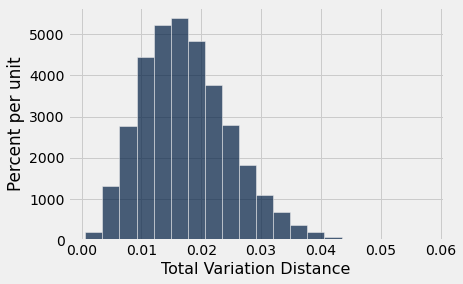

In [19]:
Table().with_column('Total Variation Distance', tvds).hist(bins = 20)

In [20]:
observed_tvd = total_variation_distance(jury.column('Panels'), eligible)
observed_tvd

0.14

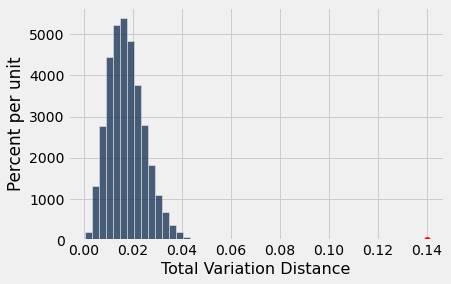

In [21]:
Table().with_column('Total Variation Distance', tvds).hist(bins = 20)
plots.scatter(observed_tvd, 0, color = 'red', s=40);